In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import pynsee
import pynsee.download
import seaborn as sns
from unidecode import unidecode

# Pour mieux lire la donnée
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 1000)



In [3]:
os.getcwd()

'C:\\Users\\Alexandre\\Projet_Diginamic_2'

In [4]:
df = pd.read_csv("C:\\Users\\Alexandre\\Projet_Diginamic_2\\dataw_fro03.csv", sep=",")

In [5]:
df.head()

,codcli,genrecli,nomcli,prenomcli,cpcli,villecli,codcde,datcde,timbrecli,timbrecde,Nbcolis,cheqcli,barchive,bstock,codobj,qte,Colis,libobj,Tailleobj,Poidsobj,points,indispobj,libcondit,prixcond,puobj
0,446,Mme,CHRÉTIEN,Daniel,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,NaN,1,1,38,2.0,1.0,Polo,XL,230,60.0,0,Carton Tête de ménagère,0,0
1,446,Mme,CHRÉTIEN,Daniel,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,NaN,1,1,30,2.0,1.0,T-shirt Blanc,L,170,60.0,0,Carton Tête de ménagère,0,0
2,446,Mme,CHRÉTIEN,Daniel,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,NaN,1,1,45,1.0,1.0,Montre,Homme,30,150.0,0,Carton Tête de ménagère,0,0
3,17860,M.,VERARDO,Anthony,35400,SAINT MALO,21239,2006-10-03 00:00:00,0.0,3.9,1.0,1.45,1,1,31,1.0,1.0,T-shirt Blanc,XL,180,60.0,0,Distingo 500 g,34,0
4,1330,Mme,ROBERT,Yvonne,61000,ALENCON,1386,2004-11-23 00:00:00,4.0,6.5,1.0,NaN,1,1,42,3.0,1.0,Tête de ménagère,Confidence,250,100.0,0,Carton Tête de ménagère,0,0


In [6]:
df.shape

(135277, 25)

In [7]:
df["Nbcolis"].value_counts()

1.0    133195
2.0      1851
3.0       183
4.0        21
5.0        12
6.0         5
7.0         2
Name: Nbcolis, dtype: int64

In [8]:
df["Colis"].value_counts()

1.0    133204
2.0      1842
3.0       181
4.0        21
5.0        12
6.0         5
7.0         2
0.0         2
Name: Colis, dtype: int64

<Axes: >

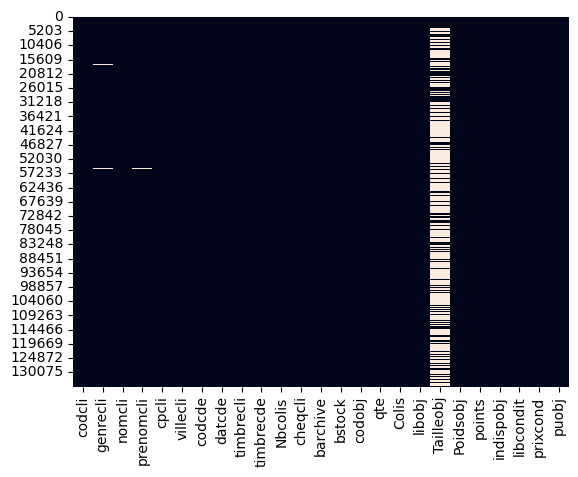

In [9]:
# HeatMap des valeurs manquantes

sns.heatmap(df.isnull(), cbar=False)

In [10]:
# Isolation des variables qui nous intéressent vis-à-vis du cahier des charges

liste_colonnes_projet = [
    "codcli",
    "nomcli",
    "cpcli",
    "villecli",
    "codcde",
    "datcde",
    "timbrecli",
    "timbrecde",
    "Nbcolis",
    "qte",
    "libobj",
    "points",
]

In [11]:
df_2 = df[liste_colonnes_projet]

In [12]:
type(df_2)

pandas.core.frame.DataFrame

In [13]:
df_2.head()

,codcli,nomcli,cpcli,villecli,codcde,datcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points
0,446,CHRÉTIEN,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,2.0,Polo,60.0
1,446,CHRÉTIEN,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,2.0,T-shirt Blanc,60.0
2,446,CHRÉTIEN,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,1.0,Montre,150.0
3,17860,VERARDO,35400,SAINT MALO,21239,2006-10-03 00:00:00,0.0,3.9,1.0,1.0,T-shirt Blanc,60.0
4,1330,ROBERT,61000,ALENCON,1386,2004-11-23 00:00:00,4.0,6.5,1.0,3.0,Tête de ménagère,100.0


In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135277 entries, 0 to 135276
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135277 non-null  int64  
 1   nomcli     135277 non-null  object 
 2   cpcli      135277 non-null  int64  
 3   villecli   135277 non-null  object 
 4   codcde     135277 non-null  int64  
 5   datcde     135275 non-null  object 
 6   timbrecli  135273 non-null  float64
 7   timbrecde  135268 non-null  float64
 8   Nbcolis    135269 non-null  float64
 9   qte        135274 non-null  float64
 10  libobj     135277 non-null  object 
 11  points     135015 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 12.4+ MB


In [15]:
# Suppression des individus dont la date n'est pas renseignée
df_2 = df_2.dropna(subset=["datcde"])

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135275 entries, 0 to 135276
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135275 non-null  int64  
 1   nomcli     135275 non-null  object 
 2   cpcli      135275 non-null  int64  
 3   villecli   135275 non-null  object 
 4   codcde     135275 non-null  int64  
 5   datcde     135275 non-null  object 
 6   timbrecli  135271 non-null  float64
 7   timbrecde  135266 non-null  float64
 8   Nbcolis    135267 non-null  float64
 9   qte        135272 non-null  float64
 10  libobj     135275 non-null  object 
 11  points     135013 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 13.4+ MB


# Feature Engineering

Pour pouvoir récupèrer les analyses demandées par le client, nous devons construire une variable "Département" ainsi qu'une variable "année".

Nous allons donc parser les valeurs de la variable cpcli pour ne récupèrer que le département lié au code postal. De la même manière nous allons récupèrer la variable année à partir de la variable datcde.

In [17]:
#### Parser le cpcli et le champs datcde

df_2["Dpt"] = [str(x)[:2] for x in df_2["cpcli"]]
df_2[["Année", "Mois", "Jour"]] = df_2.datcde.str.split("-", expand=True)

In [18]:
df_2.head()

,codcli,nomcli,cpcli,villecli,codcde,datcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année,Mois,Jour
0,446,CHRÉTIEN,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,2.0,Polo,60.0,14,2004,10,22 00:00:00
1,446,CHRÉTIEN,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,2.0,T-shirt Blanc,60.0,14,2004,10,22 00:00:00
2,446,CHRÉTIEN,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,1.0,Montre,150.0,14,2004,10,22 00:00:00
3,17860,VERARDO,35400,SAINT MALO,21239,2006-10-03 00:00:00,0.0,3.9,1.0,1.0,T-shirt Blanc,60.0,35,2006,10,03 00:00:00
4,1330,ROBERT,61000,ALENCON,1386,2004-11-23 00:00:00,4.0,6.5,1.0,3.0,Tête de ménagère,100.0,61,2004,11,23 00:00:00


In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135275 entries, 0 to 135276
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135275 non-null  int64  
 1   nomcli     135275 non-null  object 
 2   cpcli      135275 non-null  int64  
 3   villecli   135275 non-null  object 
 4   codcde     135275 non-null  int64  
 5   datcde     135275 non-null  object 
 6   timbrecli  135271 non-null  float64
 7   timbrecde  135266 non-null  float64
 8   Nbcolis    135267 non-null  float64
 9   qte        135272 non-null  float64
 10  libobj     135275 non-null  object 
 11  points     135013 non-null  float64
 12  Dpt        135275 non-null  object 
 13  Année      135275 non-null  object 
 14  Mois       135275 non-null  object 
 15  Jour       135275 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 17.5+ MB


In [20]:
# Conversion du département en int


df_2["Dpt"] = df_2["Dpt"].astype(int)

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135275 entries, 0 to 135276
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135275 non-null  int64  
 1   nomcli     135275 non-null  object 
 2   cpcli      135275 non-null  int64  
 3   villecli   135275 non-null  object 
 4   codcde     135275 non-null  int64  
 5   datcde     135275 non-null  object 
 6   timbrecli  135271 non-null  float64
 7   timbrecde  135266 non-null  float64
 8   Nbcolis    135267 non-null  float64
 9   qte        135272 non-null  float64
 10  libobj     135275 non-null  object 
 11  points     135013 non-null  float64
 12  Dpt        135275 non-null  int32  
 13  Année      135275 non-null  object 
 14  Mois       135275 non-null  object 
 15  Jour       135275 non-null  object 
dtypes: float64(5), int32(1), int64(3), object(7)
memory usage: 17.0+ MB


In [22]:
# Conversion de l'année en int
df_2["Année"] = df_2["Année"].astype(int)

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135275 entries, 0 to 135276
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135275 non-null  int64  
 1   nomcli     135275 non-null  object 
 2   cpcli      135275 non-null  int64  
 3   villecli   135275 non-null  object 
 4   codcde     135275 non-null  int64  
 5   datcde     135275 non-null  object 
 6   timbrecli  135271 non-null  float64
 7   timbrecde  135266 non-null  float64
 8   Nbcolis    135267 non-null  float64
 9   qte        135272 non-null  float64
 10  libobj     135275 non-null  object 
 11  points     135013 non-null  float64
 12  Dpt        135275 non-null  int32  
 13  Année      135275 non-null  int32  
 14  Mois       135275 non-null  object 
 15  Jour       135275 non-null  object 
dtypes: float64(5), int32(2), int64(3), object(6)
memory usage: 16.5+ MB


In [24]:
# Suppression des variables Mois et Jour que nous n'utiliserons pas ici.

df_2 = df_2.drop(["Mois", "Jour", "datcde"], axis=1)

In [25]:
df_2.head()

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année
0,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,2.0,Polo,60.0,14,2004
1,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,2.0,T-shirt Blanc,60.0,14,2004
2,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,1.0,Montre,150.0,14,2004
3,17860,VERARDO,35400,SAINT MALO,21239,0.0,3.9,1.0,1.0,T-shirt Blanc,60.0,35,2006
4,1330,ROBERT,61000,ALENCON,1386,4.0,6.5,1.0,3.0,Tête de ménagère,100.0,61,2004


In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135275 entries, 0 to 135276
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135275 non-null  int64  
 1   nomcli     135275 non-null  object 
 2   cpcli      135275 non-null  int64  
 3   villecli   135275 non-null  object 
 4   codcde     135275 non-null  int64  
 5   timbrecli  135271 non-null  float64
 6   timbrecde  135266 non-null  float64
 7   Nbcolis    135267 non-null  float64
 8   qte        135272 non-null  float64
 9   libobj     135275 non-null  object 
 10  points     135013 non-null  float64
 11  Dpt        135275 non-null  int32  
 12  Année      135275 non-null  int32  
dtypes: float64(5), int32(2), int64(3), object(3)
memory usage: 13.4+ MB


In [27]:
# Suppression des lignes dont Nbcolis n'est pas référencé

df_2 = df_2.dropna(subset=["Nbcolis"])

In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135267 entries, 0 to 135276
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135267 non-null  int64  
 1   nomcli     135267 non-null  object 
 2   cpcli      135267 non-null  int64  
 3   villecli   135267 non-null  object 
 4   codcde     135267 non-null  int64  
 5   timbrecli  135263 non-null  float64
 6   timbrecde  135264 non-null  float64
 7   Nbcolis    135267 non-null  float64
 8   qte        135264 non-null  float64
 9   libobj     135267 non-null  object 
 10  points     135005 non-null  float64
 11  Dpt        135267 non-null  int32  
 12  Année      135267 non-null  int32  
dtypes: float64(5), int32(2), int64(3), object(3)
memory usage: 13.4+ MB


In [29]:
# Suppression des lignes pour lesquelles 'qte' n'est pas référencé

df_2 = df_2.dropna(subset=["qte"])

In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135264 entries, 0 to 135276
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135264 non-null  int64  
 1   nomcli     135264 non-null  object 
 2   cpcli      135264 non-null  int64  
 3   villecli   135264 non-null  object 
 4   codcde     135264 non-null  int64  
 5   timbrecli  135260 non-null  float64
 6   timbrecde  135261 non-null  float64
 7   Nbcolis    135264 non-null  float64
 8   qte        135264 non-null  float64
 9   libobj     135264 non-null  object 
 10  points     135002 non-null  float64
 11  Dpt        135264 non-null  int32  
 12  Année      135264 non-null  int32  
dtypes: float64(5), int32(2), int64(3), object(3)
memory usage: 13.4+ MB


In [31]:
# Suppression des lignes pour lesquelles 'timbrecde' n'est pas renseigné

df_2 = df_2.dropna(subset=["timbrecde"])

In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135261 entries, 0 to 135276
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135261 non-null  int64  
 1   nomcli     135261 non-null  object 
 2   cpcli      135261 non-null  int64  
 3   villecli   135261 non-null  object 
 4   codcde     135261 non-null  int64  
 5   timbrecli  135257 non-null  float64
 6   timbrecde  135261 non-null  float64
 7   Nbcolis    135261 non-null  float64
 8   qte        135261 non-null  float64
 9   libobj     135261 non-null  object 
 10  points     134999 non-null  float64
 11  Dpt        135261 non-null  int32  
 12  Année      135261 non-null  int32  
dtypes: float64(5), int32(2), int64(3), object(3)
memory usage: 13.4+ MB


In [33]:
# Imputation des valeurs manquantes pour 'timbrecli' par 0, conformément au cahier des charges
df_2["timbrecli"].fillna(0, inplace=True)

In [34]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135261 entries, 0 to 135276
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135261 non-null  int64  
 1   nomcli     135261 non-null  object 
 2   cpcli      135261 non-null  int64  
 3   villecli   135261 non-null  object 
 4   codcde     135261 non-null  int64  
 5   timbrecli  135261 non-null  float64
 6   timbrecde  135261 non-null  float64
 7   Nbcolis    135261 non-null  float64
 8   qte        135261 non-null  float64
 9   libobj     135261 non-null  object 
 10  points     134999 non-null  float64
 11  Dpt        135261 non-null  int32  
 12  Année      135261 non-null  int32  
dtypes: float64(5), int32(2), int64(3), object(3)
memory usage: 13.4+ MB


In [35]:
df_2[df_2["points"].isna()]["libobj"].value_counts()

Etiquettes              170
Porte-clé                43
Crayon bille             40
Autocollant               4
Boite Bons Mayennais      3
Papier Beurre             2
Name: libobj, dtype: int64

Les commandes qui n'ont pas les 'points' référencés sont relatives à des petits objets sans grande valeur. Nous allons donc imputer les valeurs manquantes de la catégorie 'points' par 10, après avoir regardé à quoi correspondent les objets qui coutent 10 points ou à peine plus.

In [36]:
df[df["points"] == 10]["libobj"].value_counts()

Magnet                    251
Sticker                    53
Porte-clé Jeton Caddie      3
Name: libobj, dtype: int64

In [37]:
df[df["points"] == 0]["libobj"].value_counts()

Flyer              10660
Flyer 2014          9273
Collecteur           254
Sac Pique-Nique      223
Malette BBQ           36
BRI                   24
Barbecue              13
Name: libobj, dtype: int64

In [38]:
# Imputation des valeurs manquantes pour la variable 'points'
df_2["points"].fillna(10, inplace=True)

In [39]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135261 entries, 0 to 135276
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135261 non-null  int64  
 1   nomcli     135261 non-null  object 
 2   cpcli      135261 non-null  int64  
 3   villecli   135261 non-null  object 
 4   codcde     135261 non-null  int64  
 5   timbrecli  135261 non-null  float64
 6   timbrecde  135261 non-null  float64
 7   Nbcolis    135261 non-null  float64
 8   qte        135261 non-null  float64
 9   libobj     135261 non-null  object 
 10  points     135261 non-null  float64
 11  Dpt        135261 non-null  int32  
 12  Année      135261 non-null  int32  
dtypes: float64(5), int32(2), int64(3), object(3)
memory usage: 13.4+ MB


In [40]:
df_2[df_2["libobj"] == "Porte-clé"]

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année
5198,16447,PINSON,72700,ALLONNES,19380,0.00,4.35,1.0,1.0,Porte-clé,10.0,72,2006
6208,17033,LEMONNIER,53700,VILLAINES LA JUHEL,20164,0.00,1.80,1.0,1.0,Porte-clé,10.0,53,2006
9261,5374,FORTIN,14780,LION SUR MER,22779,0.00,4.35,1.0,1.0,Porte-clé,10.0,14,2006
10053,19427,MESLET,14320,SAINT MARTIN DE FONTENAY,23464,0.00,5.80,1.0,10.0,Porte-clé,10.0,14,2007
14793,22129,FOUCAULT,72540,LOUÉ,27400,0.00,1.80,1.0,2.0,Porte-clé,10.0,72,2007
19291,24119,ANGIBAULT-THOMAS,41160,MOREE,31094,0.00,4.35,1.0,1.0,Porte-clé,10.0,41,2008
20094,24429,BUOT,14110,SAINT DENIS DE MÉRÉ,31716,0.00,5.20,1.0,5.0,Porte-clé,10.0,14,2008
20815,24703,JOLIVET,14280,ST GERMAIN LA BLANCHE HERBE,32363,0.00,3.90,1.0,1.0,Porte-clé,10.0,14,2008
21582,18908,BELLEC,56120,LES FORGES,32894,0.00,6.00,1.0,2.0,Porte-clé,10.0,56,2008
23101,21120,PERIER,50000,SAINT GEORGES MONTCOCQ,34092,0.00,4.35,1.0,2.0,Porte-clé,10.0,50,2008


In [41]:
df_2[df_2["libobj"] == "Porte-clé"]  # ancien

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année
5198,16447,PINSON,72700,ALLONNES,19380,0.00,4.35,1.0,1.0,Porte-clé,10.0,72,2006
6208,17033,LEMONNIER,53700,VILLAINES LA JUHEL,20164,0.00,1.80,1.0,1.0,Porte-clé,10.0,53,2006
9261,5374,FORTIN,14780,LION SUR MER,22779,0.00,4.35,1.0,1.0,Porte-clé,10.0,14,2006
10053,19427,MESLET,14320,SAINT MARTIN DE FONTENAY,23464,0.00,5.80,1.0,10.0,Porte-clé,10.0,14,2007
14793,22129,FOUCAULT,72540,LOUÉ,27400,0.00,1.80,1.0,2.0,Porte-clé,10.0,72,2007
19291,24119,ANGIBAULT-THOMAS,41160,MOREE,31094,0.00,4.35,1.0,1.0,Porte-clé,10.0,41,2008
20094,24429,BUOT,14110,SAINT DENIS DE MÉRÉ,31716,0.00,5.20,1.0,5.0,Porte-clé,10.0,14,2008
20815,24703,JOLIVET,14280,ST GERMAIN LA BLANCHE HERBE,32363,0.00,3.90,1.0,1.0,Porte-clé,10.0,14,2008
21582,18908,BELLEC,56120,LES FORGES,32894,0.00,6.00,1.0,2.0,Porte-clé,10.0,56,2008
23101,21120,PERIER,50000,SAINT GEORGES MONTCOCQ,34092,0.00,4.35,1.0,2.0,Porte-clé,10.0,50,2008


In [42]:
# Nettoyage de la colonne 'points'
df_2["points"].value_counts()

 100.0     20562
 0.0       20479
 60.0      19879
 80.0      15057
-20.0      10788
-500.0     10539
 150.0     10243
 40.0       7135
 20.0       5170
 30.0       3872
 15.0       2354
 50.0       2243
 120.0      1897
 25.0       1860
 70.0       1743
 10.0        569
 180.0       456
 90.0        242
 360.0       164
-2500.0        4
-2000.0        3
-1500.0        1
-1000.0        1
Name: points, dtype: int64

In [43]:
df_2[df_2["points"] >= 0]

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année
0,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.80,1.0,2.0,Polo,60.0,14,2004
1,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.80,1.0,2.0,T-shirt Blanc,60.0,14,2004
2,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.80,1.0,1.0,Montre,150.0,14,2004
3,17860,VERARDO,35400,SAINT MALO,21239,0.0,3.90,1.0,1.0,T-shirt Blanc,60.0,35,2006
4,1330,ROBERT,61000,ALENCON,1386,4.0,6.50,1.0,3.0,Tête de ménagère,100.0,61,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135272,39079,GERMAIN,59600,ASSEVENT,90038,0.0,7.35,1.0,1.0,Cloche à camembert,50.0,59,2021
135273,41291,GERMAIN,24100,BERGERAC,90047,4.5,8.80,1.0,2.0,Tête de ménagère,100.0,24,2021
135274,41291,GERMAIN,24100,BERGERAC,90047,4.5,8.80,1.0,3.0,T-shirt Blanc,60.0,24,2021
135275,41291,GERMAIN,24100,BERGERAC,90048,4.2,7.95,1.0,3.0,T-shirt Blanc,60.0,24,2021


In [44]:
# Suppression des individus dont la valeur pour 'points' est inférieure ou égale à 0

df_2 = df_2[df_2["points"] > 0]

In [45]:
# Fin du nettoyage vis à vis de la variable 'année'
df_2["Année"].value_counts()

2006    9243
2008    8282
2007    7785
2009    6905
2010    6846
2011    6098
2016    5537
2019    5193
2012    5140
2017    5137
2015    5058
2018    5047
2014    4947
2020    4935
2013    4577
2021    2678
2005      22
2004       9
1899       4
1015       3
Name: Année, dtype: int64

In [46]:
df_2[df_2["Année"] == 1015]

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année
93461,3490,GAUTIER,72160,TUFFE VAL DE LA CHERONNE,69938,0.0,8.0,1.0,3.0,Drap de bain,80.0,72,1015
93462,3490,GAUTIER,72160,TUFFE VAL DE LA CHERONNE,69938,0.0,8.0,1.0,1.0,Montre,150.0,72,1015
93463,3490,GAUTIER,72160,TUFFE VAL DE LA CHERONNE,69938,0.0,8.0,1.0,1.0,Jeu de cartes,20.0,72,1015


In [47]:
# Modification des valeurs aberrantes pour la variable 'Année'

df_2.loc[df_2["Année"] == 1015, "Année"] = 2015

In [48]:
# Suppression des individus ayant "commandé en 1899" car l'imputation semble sensible
df_2 = df_2[df_2["Année"] >= 1900]

In [49]:
df_2["Année"].value_counts()

2006    9243
2008    8282
2007    7785
2009    6905
2010    6846
2011    6098
2016    5537
2019    5193
2012    5140
2017    5137
2015    5061
2018    5047
2014    4947
2020    4935
2013    4577
2021    2678
2005      22
2004       9
Name: Année, dtype: int64

In [164]:
df_2['villecli'].value_counts()

LE MANS                     1567
CAEN                        1036
LAVAL                        811
FLERS                        694
VIRE NORMANDIE               633
                            ... 
AUCEY LA PLAINE                1
MONTFARVILLE                   1
BERCHERES LES PIERRES          1
PLÉLAN LE GRAND                1
LES AUTHIEUX SUR CALONNE       1
Name: villecli, Length: 6606, dtype: int64

In [165]:
# Uniformisation des noms de ville après avoir vu des données du type ERNEE et ERNÉE

df_2['villecli'] = df_2['villecli'].apply(unidecode) # translittération
df_2['villecli'] = df_2['villecli'].str.upper() # Conversion en majuscules


In [166]:
# Export du jeu de données nettoyé sous csv

df_2.to_csv("projet_2_propre_full_final.csv", index=False, header=True)

In [51]:
df_2.describe()

,codcli,cpcli,codcde,timbrecli,timbrecde,Nbcolis,qte,points,Dpt,Année
count,93442.000000,93442.000000,93442.000000,93442.000000,93442.000000,93442.000000,93442.000000,93442.000000,93442.000000,93442.000000
mean,20013.554622,48318.533968,54715.786434,0.139186,5.035331,1.017540,1.603155,77.123884,48.113311,2012.422294
std,12289.300392,20418.335342,22024.899080,0.840963,2.322217,0.155253,1.680810,39.571689,20.328297,4.622198
min,27.000000,1120.000000,478.000000,0.000000,0.640000,1.000000,1.000000,10.000000,10.000000,2004.000000
25%,8638.500000,29200.000000,35626.000000,0.000000,3.200000,1.000000,1.000000,60.000000,29.000000,2008.000000
50%,20308.000000,50710.000000,55675.000000,0.000000,5.100000,1.000000,1.000000,80.000000,50.000000,2012.000000
75%,30809.750000,61360.000000,74501.750000,0.000000,6.500000,1.000000,2.000000,100.000000,61.000000,2016.000000
max,41291.000000,95870.000000,90048.000000,20.250000,17.900000,7.000000,300.000000,360.000000,95.000000,2021.000000


In [52]:
df_2["points"].value_counts()

100.0    20562
60.0     19879
80.0     15056
150.0    10241
40.0      7135
20.0      5170
30.0      3872
15.0      2354
50.0      2243
120.0     1896
25.0      1860
70.0      1743
10.0       569
180.0      456
90.0       242
360.0      164
Name: points, dtype: int64

In [53]:
df_2["Année"].value_counts()

2006    9243
2008    8282
2007    7785
2009    6905
2010    6846
2011    6098
2016    5537
2019    5193
2012    5140
2017    5137
2015    5061
2018    5047
2014    4947
2020    4935
2013    4577
2021    2678
2005      22
2004       9
Name: Année, dtype: int64

In [54]:
df_2[df_2["Année"] == 1015]

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année


In [55]:
df_2[df_2["Année"] == 1899]

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année


In [56]:
df[df["codcli"] == 40679]

,codcli,genrecli,nomcli,prenomcli,cpcli,villecli,codcde,datcde,timbrecli,timbrecde,Nbcolis,cheqcli,barchive,bstock,codobj,qte,Colis,libobj,Tailleobj,Poidsobj,points,indispobj,libcondit,prixcond,puobj
130390,40679,Mme,LUCE,Arlette,61140,BAGNOLES DE L ORNE NORMANDIE,87671,1899-12-30 00:00:00,0.0,2.1,1.0,1.85,1,1,44,1.0,1.0,Montre,Femme,20,150.0,0,Distingo 50 g,132,0
130583,40679,Mme,LUCE,Arlette,61140,BAGNOLES DE L ORNE NORMANDIE,87671,1899-12-30 00:00:00,0.0,2.1,1.0,1.85,1,1,44,1.0,1.0,Montre,Femme,20,150.0,0,Distingo 50 g,132,0
131080,40679,Mme,LUCE,Arlette,61140,BAGNOLES DE L ORNE NORMANDIE,88003,2020-11-24 00:00:00,0.0,8.8,1.0,8.60,1,1,135,3.0,1.0,Couteaux à Steak,NaN,386,60.0,0,Enveloppe Tête de ménagère,0,0
131081,40679,Mme,LUCE,Arlette,61140,BAGNOLES DE L ORNE NORMANDIE,88003,2020-11-24 00:00:00,0.0,8.8,1.0,8.60,1,1,159,2.0,1.0,Magnet,NaN,36,10.0,0,Enveloppe Tête de ménagère,0,0
131082,40679,Mme,LUCE,Arlette,61140,BAGNOLES DE L ORNE NORMANDIE,88003,2020-11-24 00:00:00,0.0,8.8,1.0,8.60,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Enveloppe Tête de ménagère,0,0


In [57]:
df[df["codcli"] == 1247]

,codcli,genrecli,nomcli,prenomcli,cpcli,villecli,codcde,datcde,timbrecli,timbrecde,Nbcolis,cheqcli,barchive,bstock,codobj,qte,Colis,libobj,Tailleobj,Poidsobj,points,indispobj,libcondit,prixcond,puobj
15279,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,27814,2007-08-27 00:00:00,0.0,5.8,1.0,5.80,1,1,41,3.0,1.0,Drap de bain,NaN,400,80.0,0,Carton Drap de Bain,0,0
15280,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,27814,2007-08-27 00:00:00,0.0,5.8,1.0,5.80,1,1,23,1.0,1.0,Convertisseur,NaN,50,50.0,0,Carton Drap de Bain,0,0
29613,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,38889,2009-04-08 00:00:00,0.0,4.5,1.0,4.50,1,1,58,1.0,1.0,Louche,Confidence,210,100.0,0,Carton Louche,0,0
57936,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,53937,1899-12-30 00:00:00,0.0,4.6,1.0,4.35,1,1,41,1.0,1.0,Drap de bain,NaN,400,80.0,0,Enveloppe Drap de Bain,0,0
57937,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,53937,1899-12-30 00:00:00,0.0,4.6,1.0,4.35,1,1,84,1.0,1.0,Flyer,NaN,0,0.0,0,Enveloppe Drap de Bain,0,0
65882,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,57791,2012-10-29 00:00:00,0.0,5.9,1.0,6.10,1,1,53,3.0,1.0,Serviette + gant,NaN,260,80.0,0,Carton 5 kg,0,0
65883,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,57791,2012-10-29 00:00:00,0.0,5.9,1.0,6.10,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Carton 5 kg,0,0
67231,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,58447,2012-12-19 00:00:00,0.0,2.5,1.0,4.80,1,1,89,1.0,1.0,Fourchettes à dessert,NaN,170,60.0,0,Enveloppe Tête de ménagère,0,0
67236,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,58447,2012-12-19 00:00:00,0.0,2.5,1.0,4.80,1,1,48,1.0,1.0,Carte publicitaire,NaN,0,-20.0,0,Enveloppe Tête de ménagère,0,0
84677,1247,Mme,HAREL,Marie-Anne,44370,LOIREAUXENCE,66516,2014-12-31 00:00:00,0.0,6.7,1.0,6.50,1,1,53,2.0,1.0,Serviette + gant,NaN,260,80.0,0,Carton 5 kg,0,0


In [58]:
df.iloc[130583]

codcli                              40679
genrecli                              Mme
nomcli                               LUCE
prenomcli                         Arlette
cpcli                               61140
villecli     BAGNOLES DE L ORNE NORMANDIE
codcde                              87671
datcde                1899-12-30 00:00:00
timbrecli                             0.0
timbrecde                             2.1
Nbcolis                               1.0
cheqcli                              1.85
barchive                                1
bstock                                  1
codobj                                 44
qte                                   1.0
Colis                                 1.0
libobj                             Montre
Tailleobj                           Femme
Poidsobj                               20
points                              150.0
indispobj                               0
libcondit                   Distingo 50 g
prixcond                          

# Valeurs manquantes

In [59]:
lignes_manquantes = df_2[df_2["qte"].isnull()]

In [60]:
lignes_manquantes

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année


In [61]:
lignes_manquantes_2 = df_2[df_2["timbrecde"].isnull()]

In [62]:
lignes_manquantes_2

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année


In [63]:
len(lignes_manquantes)

0

In [64]:
df_manquant = pd.DataFrame(columns=df_2.columns)

for col in df_2.columns:
    lignes_manquantes_col = df_2[df_2[col].isnull()]
    print(col)
    print(len(lignes_manquantes_col))
    df_manquant = pd.concat([df_manquant, lignes_manquantes_col])

codcli
0
nomcli
0
cpcli
0
villecli
0
codcde
0
timbrecli
0
timbrecde
0
Nbcolis
0
qte
0
libobj
0
points
0
Dpt
0
Année
0


In [65]:
df.iloc[22]

codcli                      8032
genrecli                     Mme
nomcli                    TEGLIA
prenomcli               Marianne
cpcli                      35230
villecli             SAINT ARMEL
codcde                      8352
datcde       2005-07-27 00:00:00
timbrecli                    1.4
timbrecde                    NaN
Nbcolis                      1.0
cheqcli                      NaN
barchive                       1
bstock                         1
codobj                        42
qte                          1.0
Colis                        1.0
libobj          Tête de ménagère
Tailleobj             Confidence
Poidsobj                     250
points                     100.0
indispobj                      0
libcondit    Lettre Suivie 500 g
prixcond                      43
puobj                          0
Name: 22, dtype: object

In [67]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93442 entries, 0 to 135276
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codcli     93442 non-null  int64  
 1   nomcli     93442 non-null  object 
 2   cpcli      93442 non-null  int64  
 3   villecli   93442 non-null  object 
 4   codcde     93442 non-null  int64  
 5   timbrecli  93442 non-null  float64
 6   timbrecde  93442 non-null  float64
 7   Nbcolis    93442 non-null  float64
 8   qte        93442 non-null  float64
 9   libobj     93442 non-null  object 
 10  points     93442 non-null  float64
 11  Dpt        93442 non-null  int32  
 12  Année      93442 non-null  int32  
dtypes: float64(5), int32(2), int64(3), object(3)
memory usage: 9.3+ MB


In [68]:
df_2.shape

(93442, 13)

In [69]:
len(df["codcde"].unique())

70897

In [70]:
len(df["codcli"].unique())

29783

In [71]:
len(df["libcondit"].unique())

40

In [72]:
df["libobj"].unique()

array(['Polo', 'T-shirt Blanc', 'Montre', 'Tête de ménagère',
       'Drap de bain', 'Serviette + gant', 'Carte publicitaire',
       'Casquette', 'Couteau à fromage', 'Louche', 'Ballon',
       'Stylo plume', 'Jeu de cartes', 'Etiquettes', 'Peluche',
       'Convertisseur', 'T-shirt Bleu foncé', 'Poupée régionale',
       'Appareil photo', 'Collecteur', "Pin's", 'Couteaux à Steak',
       'Porte-clé', 'Crayon bille', 'Boite Bons Mayennais', 'Bracelets',
       'Papier Beurre', 'Pelle à Tarte', 'Points Bonus Fidélité',
       'Gilet de sécurité', 'Autocollant', 'Couverts à Salade',
       'Tête de ménagère offerte', 'Drap de bain Bonus', 'Clé USB',
       'Pelle à Tarte offerte', 'Serviette + gant offerts',
       'Couverts de Service', 'Flyer', 'Tartineur', 'Points Flyer', 'BRI',
       'Polo offert', 'Lampe', 'Fourchettes à dessert', 'Flyer 2014',
       'Sac shopping', 'Porte-clé Jeton Caddie', 'Cloche à camembert',
       'Tablier', 'Sac Pique-Nique', 'Cuillères à Café', 'T-shirt N

In [73]:
df["Nbcolis"].value_counts()

1.0    133195
2.0      1851
3.0       183
4.0        21
5.0        12
6.0         5
7.0         2
Name: Nbcolis, dtype: int64

In [74]:
df["Colis"].value_counts()

1.0    133204
2.0      1842
3.0       181
4.0        21
5.0        12
6.0         5
7.0         2
0.0         2
Name: Colis, dtype: int64

In [75]:
df["timbrecli"].value_counts()

0.0000     130732
0.7700        227
4.2400        184
1.0600        164
1.5900        135
1.4500        134
5.4000        124
5.3000        123
4.3200        118
1.0800        109
0.6400        108
4.0500         96
0.7000         90
4.0000         79
1.4000         72
5.1000         61
2.1200         58
5.6000         58
1.6200         58
4.7700         55
4.8600         54
1.5400         49
4.8000         48
4.3500         46
5.5000         41
0.5800         40
0.8200         37
6.0000         37
3.1800         35
1.7400         32
4.4000         32
5.9000         32
6.4800         31
1.5000         28
5.8000         28
1.6500         28
5.9400         27
1.6800         26
1.2800         24
0.7500         23
3.7100         23
0.5300         23
1.8000         22
5.0000         22
4.4800         21
1.1600         21
1.4100         21
6.5000         20
6.4000         20
1.1000         20
1.0000         20
2.4000         19
2.6500         18
2.1000         18
0.5400         18
1.1200    

In [76]:
len(df["codobj"].unique())

120

In [77]:
len(df["libobj"].unique())

77

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135277 entries, 0 to 135276
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   codcli     135277 non-null  int64  
 1   genrecli   134552 non-null  object 
 2   nomcli     135277 non-null  object 
 3   prenomcli  134953 non-null  object 
 4   cpcli      135277 non-null  int64  
 5   villecli   135277 non-null  object 
 6   codcde     135277 non-null  int64  
 7   datcde     135275 non-null  object 
 8   timbrecli  135273 non-null  float64
 9   timbrecde  135268 non-null  float64
 10  Nbcolis    135269 non-null  float64
 11  cheqcli    135234 non-null  float64
 12  barchive   135277 non-null  int64  
 13  bstock     135277 non-null  int64  
 14  codobj     135277 non-null  int64  
 15  qte        135274 non-null  float64
 16  Colis      135269 non-null  float64
 17  libobj     135277 non-null  object 
 18  Tailleobj  48558 non-null   object 
 19  Poidsobj   135277 non-n

In [79]:
df.describe()

,codcli,cpcli,codcde,timbrecli,timbrecde,Nbcolis,cheqcli,barchive,bstock,codobj,qte,Colis,Poidsobj,points,indispobj,prixcond,puobj
count,135277.000000,135277.000000,135277.000000,135273.000000,135268.000000,135269.000000,135234.000000,135277.0,135277.0,135277.000000,135274.000000,135269.000000,135277.000000,135015.000000,135277.0,135277.000000,135277.0
mean,19724.126097,48183.938807,56835.146832,0.113174,5.076906,1.017484,4.711951,1.0,1.0,68.614391,1.442036,1.017373,150.369139,12.601563,0.0,51.438094,0.0
std,12335.239240,20452.967226,20267.018358,0.760062,2.356537,0.151864,2.600960,0.0,0.0,34.233734,1.436813,0.151511,247.473465,157.756186,0.0,112.704303,0.0
min,27.000000,1120.000000,478.000000,0.000000,0.640000,1.000000,0.000000,1.0,1.0,20.000000,1.000000,0.000000,0.000000,-2500.000000,0.0,0.000000,0.0
25%,8068.000000,28800.000000,42030.000000,0.000000,2.750000,1.000000,2.860000,1.0,1.0,42.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,19921.000000,50690.000000,58649.000000,0.000000,5.300000,1.000000,4.600000,1.0,1.0,65.000000,1.000000,1.000000,60.000000,60.000000,0.0,0.000000,0.0
75%,30915.000000,61350.000000,72837.000000,0.000000,6.500000,1.000000,6.200000,1.0,1.0,84.000000,1.000000,1.000000,250.000000,80.000000,0.0,34.000000,0.0
max,41291.000000,95870.000000,90048.000000,20.250000,17.900000,7.000000,180.000000,1.0,1.0,168.000000,300.000000,7.000000,9300.000000,360.000000,0.0,655.000000,0.0


In [80]:
df.head()

,codcli,genrecli,nomcli,prenomcli,cpcli,villecli,codcde,datcde,timbrecli,timbrecde,Nbcolis,cheqcli,barchive,bstock,codobj,qte,Colis,libobj,Tailleobj,Poidsobj,points,indispobj,libcondit,prixcond,puobj
0,446,Mme,CHRÉTIEN,Daniel,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,NaN,1,1,38,2.0,1.0,Polo,XL,230,60.0,0,Carton Tête de ménagère,0,0
1,446,Mme,CHRÉTIEN,Daniel,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,NaN,1,1,30,2.0,1.0,T-shirt Blanc,L,170,60.0,0,Carton Tête de ménagère,0,0
2,446,Mme,CHRÉTIEN,Daniel,14540,BOURGUÉBUS,478,2004-10-22 00:00:00,5.0,4.8,1.0,NaN,1,1,45,1.0,1.0,Montre,Homme,30,150.0,0,Carton Tête de ménagère,0,0
3,17860,M.,VERARDO,Anthony,35400,SAINT MALO,21239,2006-10-03 00:00:00,0.0,3.9,1.0,1.45,1,1,31,1.0,1.0,T-shirt Blanc,XL,180,60.0,0,Distingo 500 g,34,0
4,1330,Mme,ROBERT,Yvonne,61000,ALENCON,1386,2004-11-23 00:00:00,4.0,6.5,1.0,NaN,1,1,42,3.0,1.0,Tête de ménagère,Confidence,250,100.0,0,Carton Tête de ménagère,0,0


In [81]:
df.describe()

,codcli,cpcli,codcde,timbrecli,timbrecde,Nbcolis,cheqcli,barchive,bstock,codobj,qte,Colis,Poidsobj,points,indispobj,prixcond,puobj
count,135277.000000,135277.000000,135277.000000,135273.000000,135268.000000,135269.000000,135234.000000,135277.0,135277.0,135277.000000,135274.000000,135269.000000,135277.000000,135015.000000,135277.0,135277.000000,135277.0
mean,19724.126097,48183.938807,56835.146832,0.113174,5.076906,1.017484,4.711951,1.0,1.0,68.614391,1.442036,1.017373,150.369139,12.601563,0.0,51.438094,0.0
std,12335.239240,20452.967226,20267.018358,0.760062,2.356537,0.151864,2.600960,0.0,0.0,34.233734,1.436813,0.151511,247.473465,157.756186,0.0,112.704303,0.0
min,27.000000,1120.000000,478.000000,0.000000,0.640000,1.000000,0.000000,1.0,1.0,20.000000,1.000000,0.000000,0.000000,-2500.000000,0.0,0.000000,0.0
25%,8068.000000,28800.000000,42030.000000,0.000000,2.750000,1.000000,2.860000,1.0,1.0,42.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,19921.000000,50690.000000,58649.000000,0.000000,5.300000,1.000000,4.600000,1.0,1.0,65.000000,1.000000,1.000000,60.000000,60.000000,0.0,0.000000,0.0
75%,30915.000000,61350.000000,72837.000000,0.000000,6.500000,1.000000,6.200000,1.0,1.0,84.000000,1.000000,1.000000,250.000000,80.000000,0.0,34.000000,0.0
max,41291.000000,95870.000000,90048.000000,20.250000,17.900000,7.000000,180.000000,1.0,1.0,168.000000,300.000000,7.000000,9300.000000,360.000000,0.0,655.000000,0.0


#### Travaux autour de la variable 'points' qui nous servirons à la fois de nettoyage mais aussi de pouvoir considèrer cette variable comme indicateur de fidélité

In [82]:
df["points"].value_counts()

 100.0     20565
 0.0       20483
 60.0      19880
 80.0      15060
-20.0      10790
-500.0     10539
 150.0     10243
 40.0       7136
 20.0       5171
 30.0       3872
 15.0       2354
 50.0       2244
 120.0      1897
 25.0       1860
 70.0       1743
 180.0       456
 10.0        307
 90.0        242
 360.0       164
-2500.0        4
-2000.0        3
-1500.0        1
-1000.0        1
Name: points, dtype: int64

On remarque qu'il y a de nombreuses valeurs négatives, essayons de les explorer et de les comprendre.

In [83]:
df[df["points"] == -20]["libobj"].value_counts()

Carte publicitaire    6683
Points Flyer          4107
Name: libobj, dtype: int64

Les commandes qui correspondent à des valeurs de 'points' égales à 20 sont relatives à des codes promotionnels. Ce ne sont donc pas de vraies commandes, et ne devraient pas être considérées en tant que tel.

In [84]:
df[df["points"] <= -1000]

,codcli,genrecli,nomcli,prenomcli,cpcli,villecli,codcde,datcde,timbrecli,timbrecde,Nbcolis,cheqcli,barchive,bstock,codobj,qte,Colis,libobj,Tailleobj,Poidsobj,points,indispobj,libcondit,prixcond,puobj
29393,177,M. & Mme,ISABELLE,Patrick,50670,ST MICHEL DE MONTJOIE,38723,2009-03-25 00:00:00,0.0,7.0,1.0,6.40,1,1,77,1.0,1.0,Tête de ménagère offerte,NaN,250,-2500.0,0,Carton Tête de ménagère,0,0
29443,1618,Mme,BRILLET,Joëlle,49500,SAINT MARTIN DU BOIS,36223,2008-10-17 00:00:00,0.0,6.4,1.0,6.40,1,1,77,1.0,1.0,Tête de ménagère offerte,NaN,250,-2500.0,0,Carton Drap de Bain,0,0
29444,9984,M.,LEFRANC,José,72610,VILLENEUVE EN PERSEIGNE,32614,2008-05-15 00:00:00,0.0,6.0,2.0,6.00,1,1,77,1.0,2.0,Tête de ménagère offerte,NaN,250,-2500.0,0,Carton 5 kg,0,0
29477,25658,M. & Mme,SAUVAGE,Jean-Louis,53230,COURBEVEILLE,34306,2008-07-15 00:00:00,0.0,6.0,3.0,7.52,1,1,78,1.0,3.0,Drap de bain Bonus,NaN,400,-2000.0,0,Carton Drap de Bain,0,0
31804,124,Mme,BRIEN,Renée,50700,SAINT JOSEPH,40325,2009-07-30 00:00:00,0.0,7.0,2.0,7.00,1,1,80,1.0,2.0,Pelle à Tarte offerte,Confidence,120,-2500.0,0,Carton 10 kg,0,0
32464,2053,NaN,RESTAURANT L'ESPLANADE,NaN,75018,PARIS,40871,2009-08-18 00:00:00,0.0,6.4,1.0,6.40,1,1,81,1.0,1.0,Serviette + gant offerts,NaN,260,-2000.0,0,Carton 10 kg,0,0
40022,3503,M.,QUENAULT,Gérald,50200,MONTSURVENT,45676,2010-06-18 00:00:00,0.0,6.5,2.0,6.84,1,1,87,1.0,2.0,Polo offert,NaN,225,-1500.0,0,Carton Drap de Bain,0,0
93206,33901,M.,JUMELIN,Yoan,50120,EQUEURDREVILLE HAINNEVILLE,69843,2015-11-03 00:00:00,0.0,8.5,3.0,8.50,1,1,78,1.0,3.0,Drap de bain Bonus,NaN,400,-2000.0,0,Carton Spécial Grand Format,0,0
130209,24808,Mme,DIORE,Marie-France,72650,LA MILESSE,87581,2020-10-19 00:00:00,0.0,10.3,1.0,10.30,1,1,167,1.0,1.0,Tête de ménagère offerte,Confidence,0,-1000.0,0,Carton Spécial Très Grand Format,0,0


Même chose pour les commandes dont la valeur pour 'points' est inférieure à -1000.

In [85]:
df[df["points"] == -500]

,codcli,genrecli,nomcli,prenomcli,cpcli,villecli,codcde,datcde,timbrecli,timbrecde,Nbcolis,cheqcli,barchive,bstock,codobj,qte,Colis,libobj,Tailleobj,Poidsobj,points,indispobj,libcondit,prixcond,puobj
20834,24767,Mme,LIBERGE,Andrée,61310,COURMÉNIL,32378,2008-04-28 00:00:00,0.0,3.90,1.0,3.40,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Distingo 500 g,34,0
20877,393,Mme,ADAM,Micheline,76610,LE HAVRE,32418,2008-04-29 00:00:00,0.0,4.35,1.0,4.35,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Enveloppe Tête de ménagère,0,0
20881,4643,Mme,LELIGOIS,Rolande,14410,VALDALLIERE,32421,2008-04-30 00:00:00,0.0,1.40,1.0,1.40,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Distingo 50 g,132,0
20905,16853,M.,LESAUNIER,Christian,14370,ARGENCES,32393,2008-04-28 00:00:00,0.0,4.35,1.0,4.35,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Carton Louche,0,0
20913,14129,M. & Mme,FERRON,Louis,35300,FOUGERES,32398,2008-04-28 00:00:00,0.0,4.35,1.0,4.35,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Enveloppe Tête de ménagère,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135226,786,Mme,CROTTÉ,Nicole,53190,FOUGEROLLES DU PLESSIS,90021,2021-07-21 00:00:00,0.0,7.35,1.0,6.75,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Lettre Suivie 1 Kg,545,0
135236,32146,M.,MASSICOT,Loïc,14290,SAINT MARTIN DE BIENFAITE,90028,2021-07-21 00:00:00,0.0,3.20,1.0,4.00,1,1,71,2.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Ecopli 250 g,25,0
135256,5077,M.,ALLEAUME,Gérard,27300,BERNAY,90036,2021-07-23 00:00:00,0.0,10.60,1.0,11.45,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Carton GD,0,0
135258,8885,Mme,LEBRETON,Thérèse,72140,MONT ST JEAN,90037,2021-07-23 00:00:00,0.0,8.80,1.0,8.80,1,1,71,1.0,1.0,Points Bonus Fidélité,NaN,0,-500.0,0,Carton Spécial Grand Format,0,0


In [86]:
df[df["libobj"] == "Points Bonus Fidélité"]["points"].value_counts()

-500.0    10539
Name: points, dtype: int64

In [87]:
df[df["points"] == -500]["libobj"].value_counts()

Points Bonus Fidélité    10539
Name: libobj, dtype: int64

On remarque que des points bonus fidélité sont accordés à certains clients, ces données ne sont donc pas relatives à des commandes mais des bonifications. Nous ne devons donc pas les prendre en compte dans nos considérations puisqu'elles faussent nos analyses. Nous traiterons tout ça dans la partie nettoyage.

In [88]:
df.columns

Index(['codcli', 'genrecli', 'nomcli', 'prenomcli', 'cpcli', 'villecli',
       'codcde', 'datcde', 'timbrecli', 'timbrecde', 'Nbcolis', 'cheqcli',
       'barchive', 'bstock', 'codobj', 'qte', 'Colis', 'libobj', 'Tailleobj',
       'Poidsobj', 'points', 'indispobj', 'libcondit', 'prixcond', 'puobj'],
      dtype='object')

In [89]:
df["barchive"].value_counts()

1    135277
Name: barchive, dtype: int64

In [90]:
df["bstock"].value_counts()

1    135277
Name: bstock, dtype: int64

In [91]:
df["puobj"].value_counts()

0    135277
Name: puobj, dtype: int64

In [92]:
df["indispobj"].value_counts()

0    135277
Name: indispobj, dtype: int64

In [93]:
df["codobj"].value_counts()

42     13126
41     12940
84     10660
71     10539
115     9273
48      6683
45      4995
44      4940
20      4853
79      4418
85      4107
47      2981
24      2963
53      2120
135     2061
70      1860
114     1682
31      1672
88      1642
76      1636
58      1629
89      1473
109     1448
69      1386
46      1359
83      1286
139     1185
30      1114
111     1064
75      1048
32       983
107      927
137      834
23       796
82       734
55       573
29       535
138      519
22       485
154      457
160      419
157      377
38       376
152      349
123      310
136      308
146      293
147      274
39       270
155      261
56       254
159      251
166      242
72       242
21       236
140      234
165      232
112      223
67       218
122      217
28       217
118      215
124      204
27       195
37       189
145      177
54       170
36       169
119      169
150      163
26       162
153      161
117      152
25       135
149      132
162      132
40       115

In [94]:
df["Nbcolis"].value_counts()

1.0    133195
2.0      1851
3.0       183
4.0        21
5.0        12
6.0         5
7.0         2
Name: Nbcolis, dtype: int64

## Quelques explorations supplémentaires sur le jeu de données initial

In [95]:
df["genrecli"].value_counts()

Mme         79465
M.          25090
M. & Mme    24612
Melle        5377
Melles          3
mme             3
m               2
Name: genrecli, dtype: int64

In [96]:
df["cpcli"].value_counts()

61100    3282
14000    1537
61000    1503
61800    1484
72000    1382
         ... 
24330       1
45210       1
71380       1
17120       1
66350       1
Name: cpcli, Length: 2276, dtype: int64

In [97]:
liste_decompte_valeurs = [
    "cpcli",
    "codcde",
    "villecli",
    "libobj",
    "Tailleobj",
    "libcondit",
    "indispobj",
]

for ele in liste_decompte_valeurs:
    print(ele + str("-------------------"))
    print(df[ele].value_counts())

cpcli-------------------
61100    3282
14000    1537
61000    1503
61800    1484
72000    1382
         ... 
24330       1
45210       1
71380       1
17120       1
66350       1
Name: cpcli, Length: 2276, dtype: int64
codcde-------------------
88130    20
88599    18
78651    17
84161    14
84497    14
         ..
33091     1
33092     1
33093     1
33095     1
52408     1
Name: codcde, Length: 70897, dtype: int64
villecli-------------------
LE MANS                   2229
CAEN                      1537
LAVAL                     1119
FLERS                     1030
VIRE NORMANDIE             938
                          ... 
ERMENONVILLE LA PETITE       1
AVESSE                       1
BAILLOU                      1
SAINT JEAN LE THOMAS         1
ONDRES                       1
Name: villecli, Length: 6704, dtype: int64
libobj-------------------
Tête de ménagère            13137
Drap de bain                12940
Flyer                       10660
Points Bonus Fidélité       10539
Montre 

In [98]:
df["indispobj"].value_counts()

0    135277
Name: indispobj, dtype: int64

In [99]:
df["puobj"].value_counts()

0    135277
Name: puobj, dtype: int64

In [100]:
df["Tailleobj"].value_counts()

Confidence        19927
Homme              4995
Femme              4940
Reynolds           2963
XL                 2774
L                  1883
Colory             1782
XXL                1762
Verlaine           1486
Rouge              1064
M                  1019
Montmartre          929
Bordeaux            573
XXXL                508
Quartz              274
S                   265
Ungaro              234
Loop                232
12-14 ans           195
Collection          172
9-11 ans            162
2018                161
5-6 ans             135
7-8 ans              56
Fier d'être BM       53
Rivage               11
Camembert             3
Name: Tailleobj, dtype: int64

# Traitements Cahier des charges

Avant tout traitement, nous allons créer une colonne dans notre jeu de données, dont la valeur sera 1 pour chaque entrée. Cela simplifiera fortement les expressions lorsque nous appliquerons des filtres et lorsque nous effectuerons des aggrégats.

In [101]:
df_2["agg_col"] = 1

In [102]:
df_2.head()

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année,agg_col
0,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,2.0,Polo,60.0,14,2004,1
1,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,2.0,T-shirt Blanc,60.0,14,2004,1
2,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,1.0,Montre,150.0,14,2004,1
3,17860,VERARDO,35400,SAINT MALO,21239,0.0,3.9,1.0,1.0,T-shirt Blanc,60.0,35,2006,1
4,1330,ROBERT,61000,ALENCON,1386,4.0,6.5,1.0,3.0,Tête de ménagère,100.0,61,2004,1


### Lot 1 

#### 1- Nombre de commandes par ville sur le département de la Mayenne, regroupé par objet dont la quantité est supérieure à 5, depuis 2010

In [167]:
# Filtrage de notre jeu sur le département, la quantité d'objets par commande
# ainsi que sur l'année

df_2_lot_11 = df_2.loc[df_2["Dpt"] == 53]

df_2_lot_11 = df_2_lot_11.loc[df_2_lot_11["qte"] >= 5]

df_2_lot_11 = df_2_lot_11.loc[df_2_lot_11["Année"] >= 2010]

In [168]:
df_2_lot_11.shape

(189, 14)

Nous avons donc 189 commandes qui correspondent à l'intersection des filtres.

In [169]:
df_2_lot_11.head()

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année,agg_col
35758,16114,LOTTIN,53810,CHANGE,43487,0.00,4.5,1.0,7.0,Jeu de cartes,20.0,53,2010,1
35880,28665,KERVRAN,53940,LE GENEST SAINT ISLE,43574,0.00,4.5,1.0,5.0,Clé USB,40.0,53,2010,1
36212,29137,ESNAULT,53210,ARGENTRE,43794,0.00,6.4,1.0,5.0,Tête de ménagère,100.0,53,2010,1
36374,29169,PILORGE,53190,LANDIVY,43914,2.55,3.5,1.0,7.0,Clé USB,40.0,53,2010,1
36923,2751,HOUDAYER,53170,VILLIERS CHARLEMAGNE,44299,0.00,4.5,1.0,5.0,Jeu de cartes,20.0,53,2010,1


In [170]:
df_2_lot_11["libobj"].value_counts()

Tête de ménagère         84
Jeu de cartes            27
Drap de bain             22
Clé USB                  14
Torchon                  10
Serviette + gant          4
Cuillères à Café          4
Couteaux à Steak          3
Tartineur                 3
Lampe                     3
T-shirt Blanc             2
Stylo plume               2
T-shirt Noir              2
Fourchettes à dessert     1
Sac shopping              1
Polo                      1
Sommelier                 1
Couteau à fromage         1
Couverts de Service       1
T-shirt Gris              1
Montre                    1
Torchon 2021              1
Name: libobj, dtype: int64

In [171]:
groupe_lot_11_bis = (
    df_2_lot_11.groupby(["villecli"])
    .agg({"agg_col": "sum"})
    .sort_values("agg_col", ascending=False)
)

In [172]:
groupe_lot_11_bis

,agg_col
villecli,
LAVAL,9
COURCITE,7
MEZANGERS,7
ENTRAMMES,6
ERNEE,5
LE BOURGNEUF LA FORET,5
MONTENAY,4
COSSE LE VIVIEN,4
GORRON,4


In [173]:
# Ce qui nous interesse après un groupby sur villecli et libobj
groupe_lot_11 = (
    df_2_lot_11.groupby(["villecli",'libobj'])
    .agg({"agg_col": "sum"})
    .sort_values("agg_col", ascending=False)
)

In [174]:
groupe_lot_11

,,agg_col
villecli,libobj,
MEZANGERS,Tête de ménagère,7
ENTRAMMES,Drap de bain,5
ERNEE,Tête de ménagère,4
LAVAL,Clé USB,4
LE BOURGNEUF LA FORET,Clé USB,4
PRE EN PAIL ST SAMSON,Tête de ménagère,4
CHEMAZE,Tête de ménagère,3
LARCHAMP,Tête de ménagère,3
LAVAL,Tête de ménagère,3


#### 2 - Pour les 10 clients les plus fidèles depuis 2008 : le nombre, la moyenne et l'écart-type du nombre de colis par villes, avec le département

Il faudrait ici préciser avec le client, mais nous choisissons comme indicateur de "fidélité" la quantité de points de fidélité dépénsée depuis 2008.

Nous aurions pu choisir d'autres indicateurs de fidélité: La fréquence des achats avec un seuil défini (1/mois ?); l'étude du caractère "récent des achats" ; la quantité de commandes depuis 2008.

Cela signifie qu'il faut échanger avec le client pour mieux définir ses besoins en terme de fidélité.

In [109]:
df_2.head()

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année,agg_col
0,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,2.0,Polo,60.0,14,2004,1
1,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,2.0,T-shirt Blanc,60.0,14,2004,1
2,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,1.0,Montre,150.0,14,2004,1
3,17860,VERARDO,35400,SAINT MALO,21239,0.0,3.9,1.0,1.0,T-shirt Blanc,60.0,35,2006,1
4,1330,ROBERT,61000,ALENCON,1386,4.0,6.5,1.0,3.0,Tête de ménagère,100.0,61,2004,1


In [110]:
df_2.shape

(93442, 14)

In [111]:
# Filtre sur les années
df_2_lot_12 = df_2.loc[df_2["Année"] >= 2008]

In [112]:
# Récupération du nombre total d'années recensées
nb_annee = df_2_lot_12["Année"].nunique()

In [121]:
# Aggrégat de la quantité de points de fidélités dépensés par clients depuis 2008.

df_2_lot_12_group = df_2_lot_12.groupby(["codcli"]).agg(
    {
        "points": "sum",
        "Nbcolis": "sum",
        "villecli": "first",
        "Dpt": "first",
        "nomcli": "first",
    }
)

In [118]:
# Aggrégat de la quantité de points de fidélités dépensés par clients depuis 2008. --------- TEST

df_2_lot_12_group_noff = df_2_lot_12.groupby(["codcli"]).agg(
    {
        "points": "sum",
        "Nbcolis": ["sum","mean"],
        #"Nbcolis": "mean",
        "villecli": "first",
        "Dpt": "first",
        "nomcli": "first",
    }
)

In [128]:
df_2_lot_12_group_top10

,points,Nbcolis,villecli,Dpt,nomcli
codcli,,,,,
8993,6310.0,53.0,TINCHEBRAY BOCAGE,61,BRIARD
786,5530.0,70.0,FOUGEROLLES DU PLESSIS,53,CROTTÉ
27059,5235.0,71.0,LES MONTS D ANDAINE,61,LE PENVEN
5165,4350.0,47.0,ST GERMAIN DU CORBEIS,61,DALLET
23550,4195.0,96.0,MALICORNE SUR SARTHE,72,MAUGET
16615,4190.0,52.0,BALLEROY SUR DROME,14,DESHAYES
5576,3845.0,47.0,SOLESMES,72,PICHON
22300,3840.0,45.0,GACE,61,LEVESQUE
33209,3810.0,53.0,ST GERMAIN DU CORBEIS,61,ORCHOWSKI


In [126]:
# Tri par valeurs décroissantes sur 'points' et affichage des 10 premières valeurs

df_2_lot_12_group_top10 = df_2_lot_12_group.sort_values("points", ascending=False).head(10) # Nécéssité du tuple

In [125]:
df_2_lot_12_group.columns

Index(['points', 'Nbcolis', 'villecli', 'Dpt', 'nomcli'], dtype='object')

In [143]:
# Aggrégat par ville de notre top10
df_2_lot_12_group_top10_by_ville = df_2_lot_12_group_top10.groupby("villecli").agg({"Nbcolis":["sum","mean","std"]})

In [144]:
df_2_lot_12_group_top10_by_ville

Nbcolis                
                           sum  mean       std
villecli                                      
BALLEROY SUR DROME        52.0  52.0       NaN
FOUGEROLLES DU PLESSIS    70.0  70.0       NaN
GACE                      45.0  45.0       NaN
LES MONTS D ANDAINE       71.0  71.0       NaN
LOIRE AUTHION             34.0  34.0       NaN
MALICORNE SUR SARTHE      96.0  96.0       NaN
SOLESMES                  47.0  47.0       NaN
ST GERMAIN DU CORBEIS    100.0  50.0  4.242641
TINCHEBRAY BOCAGE         53.0  53.0       NaN

In [146]:
df_2_lot_12_group_top10_by_ville.columns

MultiIndex([('Nbcolis',  'sum'),
            ('Nbcolis', 'mean'),
            ('Nbcolis',  'std')],
           )

In [147]:
df_2_lot_12_group_top10_by_ville_tri_sum = df_2_lot_12_group_top10_by_ville.sort_values(('Nbcolis','sum'), ascending = False)

In [149]:
df_2_lot_12_group_top10_by_ville_tri_sum

Nbcolis                
                           sum  mean       std
villecli                                      
ST GERMAIN DU CORBEIS    100.0  50.0  4.242641
MALICORNE SUR SARTHE      96.0  96.0       NaN
LES MONTS D ANDAINE       71.0  71.0       NaN
FOUGEROLLES DU PLESSIS    70.0  70.0       NaN
TINCHEBRAY BOCAGE         53.0  53.0       NaN
BALLEROY SUR DROME        52.0  52.0       NaN
SOLESMES                  47.0  47.0       NaN
GACE                      45.0  45.0       NaN
LOIRE AUTHION             34.0  34.0       NaN

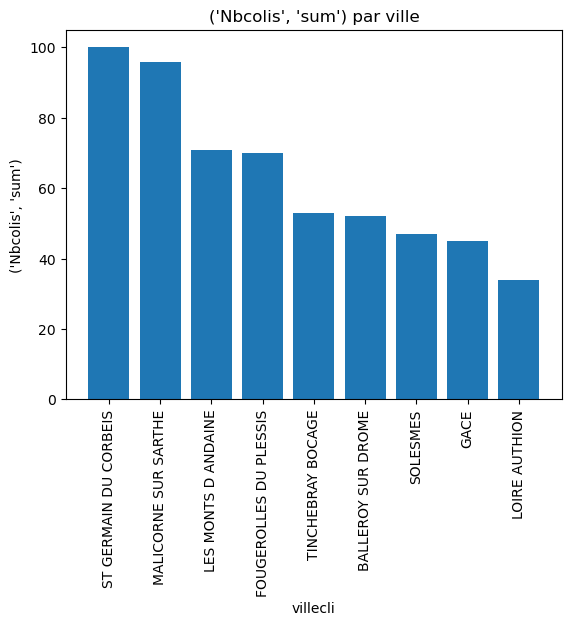

In [150]:
# Graphique représentant la somme du nombre de colis par ville pour les 10 clients les plus fidèles


plt.figure()  # Créer une nouvelle figure pour chaque graphe
plt.bar(df_2_lot_12_group_top10_by_ville_tri_sum.index, df_2_lot_12_group_top10_by_ville_tri_sum[('Nbcolis',  'sum')])
plt.xlabel("villecli")
plt.ylabel(('Nbcolis',  'sum'))
plt.title(f"{('Nbcolis',  'sum')} par ville")
plt.xticks(rotation=90)  # Faire pivoter les étiquettes des villes pour une meilleure lisibilité
plt.show()

In [151]:
# Récupération des informations sur les clients les plus fidèles triés par moyenne par ville

df_2_lot_12_group_top10_by_ville_tri_mean = df_2_lot_12_group_top10_by_ville.sort_values(('Nbcolis','mean'), ascending = False)

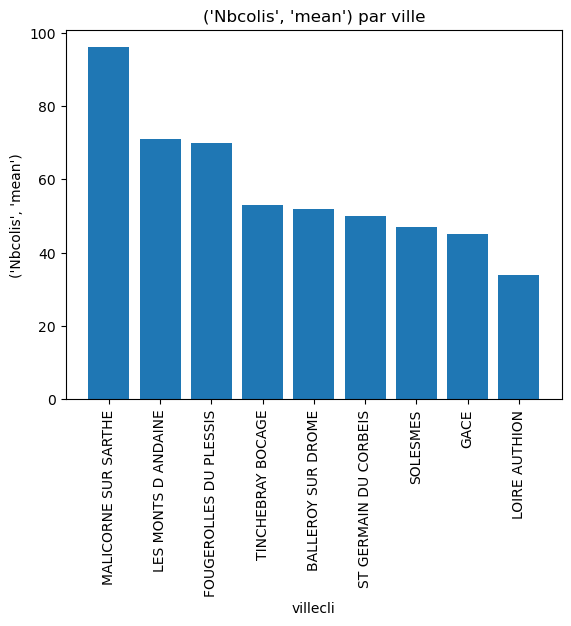

In [152]:
# Graphique représentant la moyenne du nombre de colis par ville pour les 10 clients les plus fidèles


plt.figure()  # Créer une nouvelle figure pour chaque graphe
plt.bar(df_2_lot_12_group_top10_by_ville_tri_mean.index, df_2_lot_12_group_top10_by_ville_tri_mean[('Nbcolis',  'mean')])
plt.xlabel("villecli")
plt.ylabel(('Nbcolis',  'mean'))
plt.title(f"{('Nbcolis',  'mean')} par ville")
plt.xticks(rotation=90)  # Faire pivoter les étiquettes des villes pour une meilleure lisibilité
plt.show()

In [153]:
# Récupération des informations sur les clients les plus fidèles triés par écart-type par ville

df_2_lot_12_group_top10_by_ville_tri_std = df_2_lot_12_group_top10_by_ville.sort_values(('Nbcolis','std'), ascending = False)

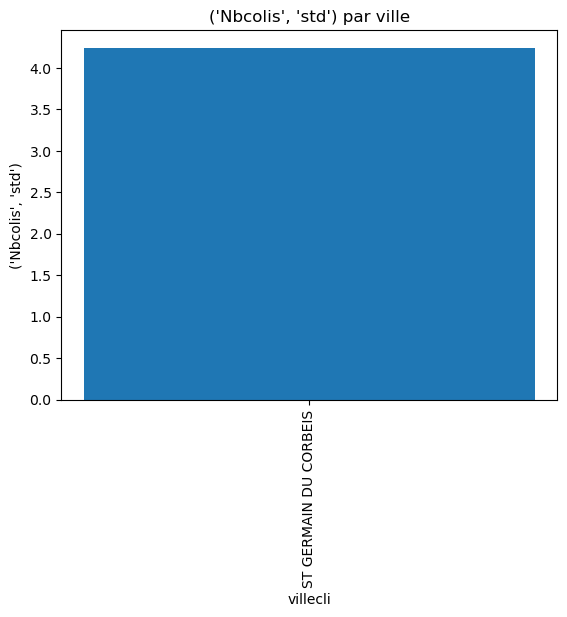

In [154]:
# Graphique représentant l'écart-type du nombre de colis par ville pour les 10 clients les plus fidèles


plt.figure()  # Créer une nouvelle figure pour chaque graphe
plt.bar(df_2_lot_12_group_top10_by_ville_tri_std.index, df_2_lot_12_group_top10_by_ville_tri_std[('Nbcolis',  'std')])
plt.xlabel("villecli")
plt.ylabel(('Nbcolis',  'std'))
plt.title(f"{('Nbcolis',  'std')} par ville")
plt.xticks(rotation=90)  # Faire pivoter les étiquettes des villes pour une meilleure lisibilité
plt.show()

In [155]:
df_2.head()

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année,agg_col
0,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,2.0,Polo,60.0,14,2004,1
1,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,2.0,T-shirt Blanc,60.0,14,2004,1
2,446,CHRÉTIEN,14540,BOURGUÉBUS,478,5.0,4.8,1.0,1.0,Montre,150.0,14,2004,1
3,17860,VERARDO,35400,SAINT MALO,21239,0.0,3.9,1.0,1.0,T-shirt Blanc,60.0,35,2006,1
4,1330,ROBERT,61000,ALENCON,1386,4.0,6.5,1.0,3.0,Tête de ménagère,100.0,61,2004,1


#### 3- Obtenir une courbe de croissance par Objet selon les départements de la Mayenne (53), de la Sarthe (72) et du Maine et Loir (49) + graphe en pdf

In [156]:
# Application des filtres qui correspondent à notre problématique
df_2_lot_13 = df_2.loc[df_2['Dpt'].isin([53,72,49])]

In [157]:
df_2_lot_13.head()

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année,agg_col
33,10964,GAILLARD,72350,BRÛLON,11815,4.05,4.35,1.0,1.0,Drap de bain,80.0,72,2005,1
34,13465,AUBRY,53970,NUILLÉ SUR VICOIN,15122,12.42,5.90,1.0,4.0,Drap de bain,80.0,53,2006,1
36,1165,DOISNEAU,53230,COSSÉ LE VIVIEN,15944,0.00,5.10,1.0,1.0,Ballon,100.0,53,2006,1
39,12708,MELISSON,72460,SAVIGNÉ L'EVÊQUE,14096,0.00,6.00,1.0,6.0,Tête de ménagère,100.0,72,2006,1
42,13360,MERCIER,72320,VIBRAYE,14894,0.00,4.35,1.0,1.0,Louche,100.0,72,2006,1


In [175]:
df_2_lot_13_group = df_2_lot_13.groupby(['libobj','Dpt','Année']).agg({"qte": 'sum'})

In [176]:
df_2_lot_13_group

qte
libobj           Dpt Année      
Appareil photo   49  2006    3.0
                     2008    2.0
                 53  2006    3.0
                     2007    3.0
                     2008    3.0
...                          ...
Verres à Vin x 6 72  2017   10.0
                     2018    6.0
                     2019    5.0
                     2020    6.0
                     2021    2.0

[1379 rows x 1 columns]

In [177]:
df_2_lot_13_group_tri = df_2_lot_13_group.sort_values("qte", ascending = False)

In [178]:
df_2_lot_13_group_tri

qte
libobj           Dpt Année       
Tête de ménagère 53  2006   502.0
                     2007   475.0
                 72  2006   420.0
Drap de bain     72  2006   407.0
Tête de ménagère 72  2008   405.0
...                           ...
Etiquettes       53  2012     1.0
                     2006     1.0
                 49  2019     1.0
                     2017     1.0
Pin's            49  2019     1.0

[1379 rows x 1 columns]

In [200]:
#### Fonction pour afficher l'évolution du nombre d'objet commandé par année et Dpt


def graph_courbe_croissance(name, df, path = None) :
    '''Fonction qui renvoie l\'évolution du nombre d\'objets commandés par années et par Dpt '''
    df = df.reset_index()
    selected_libobj = name  # Définit l'objet à sélectionner
    selected_libobj_data = df.loc[df['libobj'] == selected_libobj]

    # Création du graphique pour le libobj
    fig, ax = plt.subplots()

    # Boucler à travers les valeurs de Dpt unique pour l'objet sélectionner
    for dpt, group_data in selected_libobj_data.groupby('Dpt'):
        qte_values = group_data['qte']
        années = group_data['Année']
        label = f"Dpt: {dpt}"
        ax.plot(années, qte_values, marker='o', label=label)

    ax.set_xlabel('Année')
    ax.set_ylabel('Quantité vendue (qte)')
    ax.set_title(f"Quantité vendue pour '{selected_libobj}' par Année et Dpt")
    ax.legend()

    # Afficher le graph
    plt.tight_layout()
    if path is not None :
        plt.savefig(path)
    plt.show()


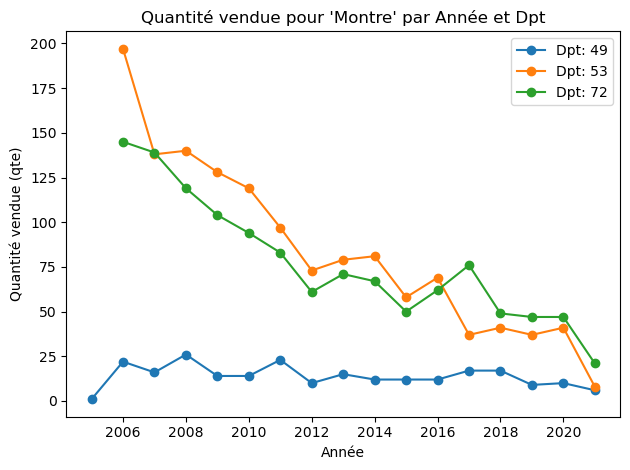

In [204]:
graph_courbe_croissance("Montre", df_2_lot_13_group, r'C:\Users\Alexandre\graphe_test.pdf')

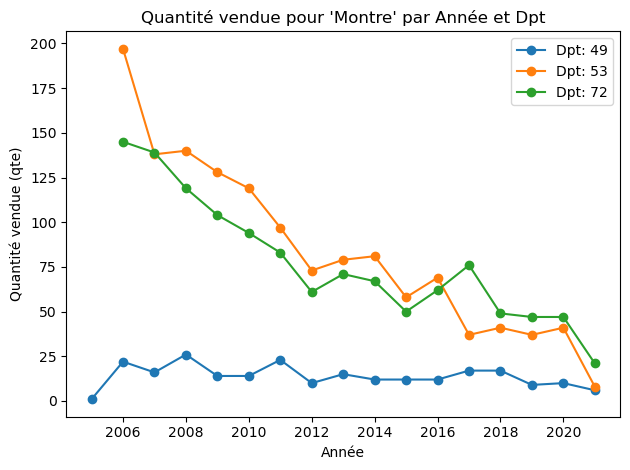

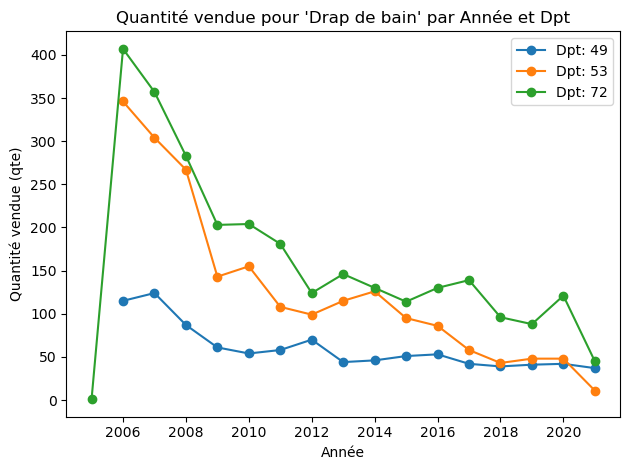

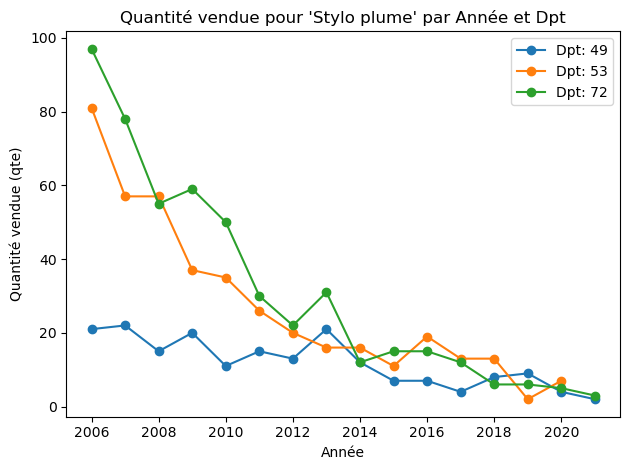

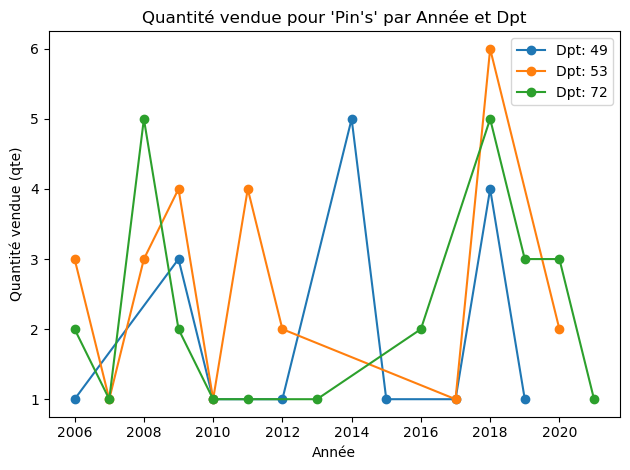

In [205]:


graph_courbe_croissance("Montre", df_2_lot_13_group)
graph_courbe_croissance("Drap de bain", df_2_lot_13_group )
graph_courbe_croissance("Stylo plume", df_2_lot_13_group )
graph_courbe_croissance("Pin's", df_2_lot_13_group )

### Lot 2

Les résultats des deux points suivants seront exportés dans un ficher Excel

#### 1 - Obtenir la ville, le nombre de colis et la somme des "timbrecde" pour les 100 meilleures commandes entre 2006 et 2016

In [208]:
# Filtrage de la colonne année, pour ne conserver que les valeurs entre 2006 et 2016

df_2_lot_21 = df_2.loc[(df_2['Année'] >= 2006) & (df_2['Année'] <= 2016)]

In [254]:
df_2_lot_21.head()

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année,agg_col
3,17860,VERARDO,35400,SAINT MALO,21239,0.0,3.90,1.0,1.0,T-shirt Blanc,60.0,35,2006,1
28,13942,PENHARD,28130,MEVOISINS,15942,0.0,4.35,1.0,1.0,Louche,100.0,28,2006,1
29,14056,LECERF,50370,LE GRAND CELLAND,15943,0.0,6.00,1.0,3.0,Drap de bain,80.0,50,2006,1
30,14056,LECERF,50370,LE GRAND CELLAND,15943,0.0,6.00,1.0,1.0,Louche,100.0,50,2006,1
32,17935,DABON,61300,L'AIGLE,21343,0.0,5.10,1.0,1.0,Ballon,100.0,61,2006,1


On va grouper sur codcde pour obtenir une table qui référencera chaque commande. Puis regarder les commandes qui valent le plus de points de fidélité. Les aggrégats seront faits uniquement sur les colonnes qui nous intéressent.

In [275]:
# Aggrégat sur la variable 'codcde' pour bien identifier les 100 meilleures commandes et ce que
# l'on souhaite regarder dessus
df_2_lot_21_group = df_2_lot_21.groupby(["codcde"]).agg(
    {
        "nomcli": 'first',
        "Dpt": "first",
        "villecli": "first",
        "timbrecli": "sum",
        "timbrecde": "sum",
        "Nbcolis": "sum",
        "points": "sum",
        "agg_col": "sum",
    }
)

In [276]:
# On renomme la dernière colonne de notre nouveau DataFrame qui correspond à la quantité de commandes

df_2_lot_21_group.rename(columns={'agg_col': 'qte_objets_commandes'}, inplace=True)

In [277]:
df_2_lot_21_group_tri = df_2_lot_21_group.sort_values('points', ascending = False).head(100)

In [262]:
df_2_lot_21_group.shape

(56192, 8)

In [278]:
df_2_lot_21_group_tri

,nomcli,Dpt,villecli,timbrecli,timbrecde,Nbcolis,points,qte_objets_commandes
codcde,,,,,,,,
61107,BOUDIN,61,DOMFRONT EN POIRAIE,0.0,65.70,9.0,740.0,9
61524,LAIGNEL,27,LA CHAPELLE GAUTHIER,0.0,73.00,10.0,710.0,10
56790,RESTAURANT L'ESPLANADE,75,PARIS,0.0,54.60,7.0,650.0,7
74386,GAUTIER,14,IFS,0.0,104.40,12.0,635.0,12
73828,LELIEVRE,61,TINCHEBRAY BOCAGE,0.0,84.80,8.0,625.0,8
52280,FOUASSE,50,LE MESNIL VILLEMAN,0.0,56.80,8.0,605.0,8
73699,PENCHÉ,72,CHAMPAGNE,0.0,84.80,24.0,600.0,8
57723,DUBOIS,72,NOYEN SUR SARTHE,0.0,39.00,6.0,600.0,6
28126,DUHAMEL,14,BEAUMAIS,0.0,36.00,6.0,600.0,6


In [279]:
# Exportation du résultat sous Excel

df_2_lot_21_group_tri.to_excel("lot21.xlsx", index=False, header=True)

In [280]:
df_2.sort_values("points", ascending = False).head(10)

,codcli,nomcli,cpcli,villecli,codcde,timbrecli,timbrecde,Nbcolis,qte,libobj,points,Dpt,Année,agg_col
131429,14377,DIZAY,14480,CREULLY SUR SEULLES,88147,0.0,9.70,1.0,1.0,Flûtes x 12,360.0,14,2020,1
121160,10357,MENDEZ,83136,FORCALQUEIRET,82968,0.0,9.25,1.0,1.0,Verres à Vin x 12,360.0,83,2019,1
117656,39135,LOUVET,61550,LA GONFRIERE,81096,0.0,13.20,1.0,1.0,Verres à Vin x 12,360.0,61,2018,1
126250,40166,WINGERT,61000,ALENCON,85556,0.0,9.40,1.0,1.0,Verres à Vin x 12,360.0,61,2020,1
124397,39963,FERRAND,61100,ATHIS VAL DE ROUVRE,84609,0.0,11.80,1.0,1.0,Verres à Vin x 12,360.0,61,2019,1
115876,31555,VIGNERON,72190,SARGE LES LE MANS,80198,0.0,9.10,1.0,1.0,Flûtes x 12,360.0,72,2018,1
131733,37900,GUERIN,44430,LE LANDREAU,88297,0.0,9.70,1.0,1.0,Verres à Vin x 12,360.0,44,2020,1
131734,37900,GUERIN,44430,LE LANDREAU,88298,0.0,10.60,2.0,1.0,Flûtes x 12,360.0,44,2020,1
114907,29681,DELANNÉE,72400,LA FERTE BERNARD,79654,0.0,9.10,1.0,1.0,Flûtes x 12,360.0,72,2018,1
124327,38482,BARBIER,27940,COURCELLES SUR SEINE,84580,0.0,10.10,2.0,1.0,Flûtes x 12,360.0,27,2019,1


#### 2- Tirer 5% du point 1 uniquement sur les départements 53, 61 et 28 sans "timbrecli", avec la ville, le nombre de colis et la proportion de commandes que cela représente

Ici le graphe de sortie sera exporté en PDF.

In [281]:
# On effectue un filtre du jeu de sortie de la Q1 sur les départements et sur 'timbrecli'

df_2_lot_22 = df_2_lot_21_group_tri.query('Dpt == 28 or Dpt == 61 or Dpt == 53')

In [282]:
df_2_lot_22['timbrecli'].value_counts()

0.0    36
Name: timbrecli, dtype: int64

In [283]:
# Nouveau filtre sur la variable 'timbrecli' qui se doit de valoir 0 ou d'être NaN
df_2_lot_22 = df_2_lot_22.loc[
    (df_2_lot_22["timbrecli"].isnull() == True) | (df_2_lot_22["timbrecli"] == 0)
]

In [285]:
df_2_lot_22.shape

(36, 8)

In [327]:
# Tirage de 5 % de notre jeu des meilleures commandes filtrées par département
df_2_lot_22_tirage = df_2_lot_22.sample(frac =0.05, random_state=10)

In [328]:
df_2_lot_22_tirage

,nomcli,Dpt,villecli,timbrecli,timbrecde,Nbcolis,points,qte_objets_commandes
codcde,,,,,,,,
63719,MARY,61,SAINT PIERRE D'ENTREMONT,0.0,27.6,4.0,480.0,4
61817,FILLÂTRE,61,LA CHAPELLE VIEL,0.0,40.0,25.0,460.0,5


In [329]:
qte_objets_commande_totale = df_2_lot_22_tirage['qte_objets_commandes'].sum()

In [330]:
qte_objets_commande_totale

9

In [331]:
df_2_lot_22_tirage['proportion_objets_commandés'] = df_2_lot_22_tirage['qte_objets_commandes']/qte_objets_commande_totale

In [332]:
df_2_lot_22_tirage.columns

Index(['nomcli', 'Dpt', 'villecli', 'timbrecli', 'timbrecde', 'Nbcolis',
       'points', 'qte_objets_commandes', 'proportion_objets_commandés'],
      dtype='object')

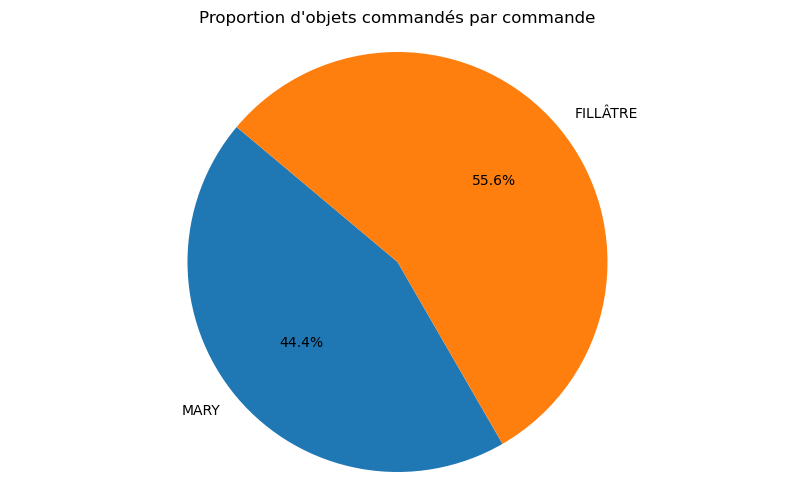

In [333]:
# Créer le diagramme en camembert
plt.figure(figsize=(10, 6))
plt.pie(df_2_lot_22_tirage['proportion_objets_commandés'], labels=df_2_lot_22_tirage['nomcli'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion d\'objets commandés par commande')
plt.axis('equal')  


plt.show()